https://stepik.org/lesson/1576173/step/7

Q = tensor(0.0291, grad_fn=<MeanBackward0>)


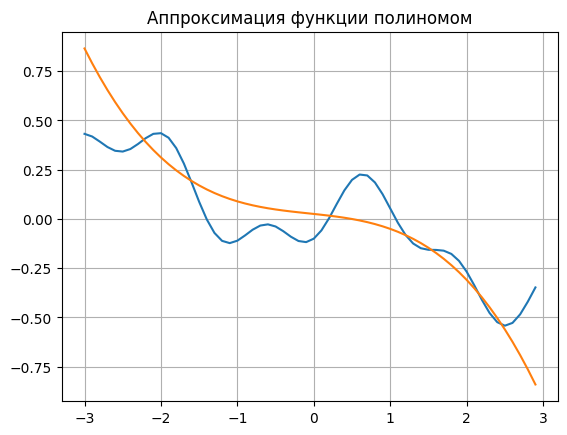

In [ ]:
import numpy as np
import torch
import torch.optim as optim

# Данные
n_features = 4 # число коэффициентов w
x = torch.arange(-3, 3, 0.1)
y_train = -0.1 * x + 0.2 * torch.sin(2 * x) - 0.1 * torch.cos(5 * x)
x_train = torch.tensor([[_x ** _n for _n in range(n_features)] for _x in x])

# Веса
w = torch.FloatTensor(n_features).uniform_(-1e-5, 1e-5)
w.requires_grad_(True)

# Параметры ГС
total = len(y_train)
lr = 0.01                                    # шаг обучения
N = 1000                                     # число итераций алгоритма SGD
loss_func = torch.nn.MSELoss()               # функция потерь
optimizer = optim.RMSprop(params=[w], lr=lr) # оптимизатор

np.random.seed(1) # установка "зерна" генератора датчика случайных чисел

# ГС
for _ in range(N):
    k = np.random.randint(0, total) # случайный индекс для выбора образа
    y = x_train[k] @ w              # предсказание по этому образу с текущими весами
    loss = loss_func(y, y_train[k]) # потери с таким предсказанием
    loss.backward()                 # проход назад с подсчётом производных
    optimizer.step()                # шаг с заданным выше оптимизатором
    optimizer.zero_grad()           # чистим накопленный градиент

Q = ((y_train - x_train @ w)**2).mean().item()
print('Q =', Q)

# График
import matplotlib.pyplot as plt

plt.plot(x, y_train)
plt.plot(x, (x_train @ w).detach().numpy())
plt.grid()
plt.title('Аппроксимация функции полиномом')
plt.show()
